In [52]:
#!/usr/WS2/bolet1/gregvirtenv/bin/python
from SALib.sample import saltelli
from SALib import sample
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the model inputs
pi = 3.14159265359
bound = [-pi, pi]
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [bound,
               bound,
               bound]
}

In [3]:
# Generate samples
#param_values = saltelli.sample(problem, 1024)
param_values = saltelli.sample(problem, 1024)
print('points to sample', len(param_values))

# Run model (example)
print('sampling model...')
Y = Ishigami.evaluate(param_values)

# Perform analysis
print('doing analysis:')
Si = sobol.analyze(problem, Y, print_to_console=True)

print('results:')
# Print the first-order sensitivity indices
print(Si['S1'])

points to sample 8192
sampling model...
doing analysis:
          ST   ST_conf
x1  0.555860  0.096039
x2  0.441898  0.041772
x3  0.244675  0.031026
          S1   S1_conf
x1  0.316832  0.071348
x2  0.443763  0.053351
x3  0.012203  0.057645
                S2   S2_conf
(x1, x2)  0.009254  0.095647
(x1, x3)  0.238172  0.115208
(x2, x3) -0.004888  0.068807
results:
[0.31683154 0.44376306 0.01220312]


## How good is the Sobol' method with small to large amounts of data?

In [59]:
resultsX = []
sTresultsY = []
s1resultsY = []
s2resultsY = []


params_to_plot = None
colors_to_plot = None

for i in range(1, 15):
    # Generate samples
    #param_values = saltelli.sample(problem, 1024)
    param_values = saltelli.sample(problem, 2**i)
    #print('points to sample', param_values)
    
    num_samples = param_values.shape[0]
    print(num_samples)

    # Run model (example)
    print('sampling model...')
    Y = Ishigami.evaluate(param_values)
    
    if i == 11:
        params_to_plot = param_values
        colors_to_plot = Y

    # Perform analysis
    print('doing analysis:')
    Si = sobol.analyze(problem, Y, print_to_console=True)

    print('results:')
    # Print the first-order sensitivity indices

    resultsX.append([num_samples]*3)
    sTresultsY.append(Si['ST'])
    s1resultsY.append(Si['S1'])
    
    single = Si['S2'].flatten()
    single = single[~np.isnan(single)]
    s2resultsY.append(single)

16
sampling model...
doing analysis:
          ST     ST_conf
x1  1.393785  255.053039
x2  0.822597   75.998182
x3  0.343709   31.754582
          S1     S1_conf
x1 -0.276975  103.841404
x2  1.618383   55.701812
x3 -1.046123   36.005672
                S2     S2_conf
(x1, x2) -0.128342  144.647072
(x1, x3)  2.057276   88.903288
(x2, x3) -0.264059    6.734772
results:
32
sampling model...
doing analysis:
          ST    ST_conf
x1  0.879515  67.580473
x2  1.034970  20.072915
x3  0.216222   8.427532
          S1    S1_conf
x1 -0.164237  26.266367
x2  1.508100  14.080085
x3 -0.647012   9.190241
                S2    S2_conf
(x1, x2) -0.067651  36.886889
(x1, x3)  1.320942  22.320280
(x2, x3) -0.097490   3.252337
results:
64
sampling model...
doing analysis:
          ST   ST_conf
x1  0.866955  4.030594
x2  0.901023  1.406193
x3  0.319153  0.610039
          S1   S1_conf
x1 -0.118271  1.696941
x2  1.222617  1.012116
x3 -0.622857  0.623610
                S2   S2_conf
(x1, x2) -0.011970  2.

In [60]:
resultsX = np.array(resultsX)
resultsX

array([[    16,     16,     16],
       [    32,     32,     32],
       [    64,     64,     64],
       [   128,    128,    128],
       [   256,    256,    256],
       [   512,    512,    512],
       [  1024,   1024,   1024],
       [  2048,   2048,   2048],
       [  4096,   4096,   4096],
       [  8192,   8192,   8192],
       [ 16384,  16384,  16384],
       [ 32768,  32768,  32768],
       [ 65536,  65536,  65536],
       [131072, 131072, 131072]])

In [61]:
sTresultsY = np.array(sTresultsY)
s1resultsY = np.array(s1resultsY)
s2resultsY = np.array(s2resultsY)

In [62]:
print(sTresultsY[0:2])
print(sTresultsY[0:2, 0])

[[1.39378483 0.82259714 0.3437086 ]
 [0.87951547 1.03496955 0.21622245]]
[1.39378483 0.87951547]


Text(0.5, 1.0, 'Second-order Index')

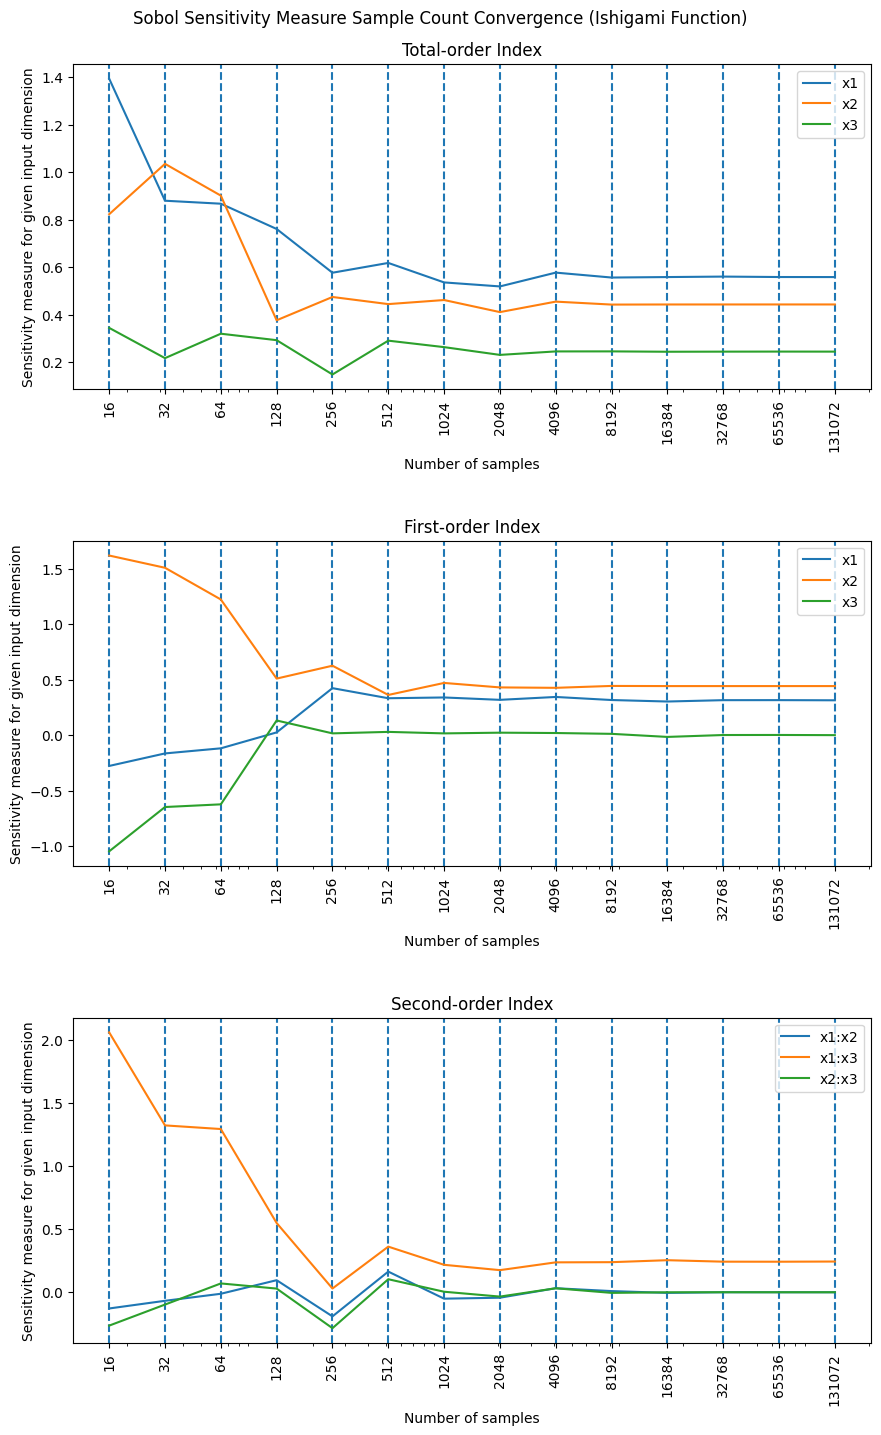

In [63]:
fig, axs = plt.subplots(3,1, figsize=(10,15))

lines = ['x1', 'x2', 'x3']
inter = ['x1:x2', 'x1:x3', 'x2:x3']

# set the background vertical lines
for ax in axs:
    for elem in resultsX[0:, 0]:
        ax.axvline(elem, ls='--')

for i in range(3):
    axs[0].plot(resultsX[0:, i], sTresultsY[0:, i], label=lines[i])
    axs[1].plot(resultsX[0:, i], s1resultsY[0:, i], label=lines[i])
    axs[2].plot(resultsX[0:, i], s2resultsY[0:, i], label=inter[i])


for ax in axs:
    ax.set_xscale('log')
    labels = resultsX[0:, 0]
    ax.set_xticks(labels)
    ax.set_xticklabels(labels, rotation=90)
    ax.legend()

    ax.set_xlabel('Number of samples')
    ax.set_ylabel('Sensitivity measure for given input dimension')
    
fig.suptitle('Sobol Sensitivity Measure Sample Count Convergence (Ishigami Function)', y=0.99)
fig.tight_layout(pad=5.0)
axs[0].set_title('Total-order Index')
axs[1].set_title('First-order Index')
axs[2].set_title('Second-order Index')




# Now let's visualize the Ishigami Function to see how it behaves

In [64]:
import plotly.express as px

In [65]:
print(params_to_plot, colors_to_plot)

[[-3.13699071 -1.17042734  1.47108758]
 [ 1.55085458 -1.17042734  1.47108758]
 [-3.13699071 -1.1336118   1.47108758]
 ...
 [ 2.5233984   2.77190328 -2.64611686]
 [ 2.5233984   2.76576736 -1.04157295]
 [ 2.5233984   2.76576736 -2.64611686]] [5.9298628  7.40466031 5.73842639 ... 4.33489506 1.59080684 4.364031  ]


In [66]:
x = params_to_plot[:, 0]
y = params_to_plot[:, 1]
z = params_to_plot[:, 2]

fig = px.scatter_3d(x=x, y=y, z=z,
                    color=colors_to_plot, labels={'x':'x1', 'y':'x2', 'z':'x3'})
fig.show()